<a href="https://colab.research.google.com/github/Msanjayds/Machine_Learning_Projects/blob/master/5%20.%20Ship%20Crew%20Size%20Prediction/Predicting_Ship_Crew_Size.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Machine Learning model to Predict the Ship Crew Size

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Read the DAta and display the basic stats

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Msanjayds/Machine_Learning_Projects/master/5%20.%20Ship%20Crew%20Size%20Prediction/cruise_ship_info.csv")
df.head()

,Ship_name,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,crew
0,Journey,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
1,Quest,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
2,Celebration,Carnival,26,47.262,14.86,7.22,7.43,31.80,6.70
3,Conquest,Carnival,11,110.000,29.74,9.53,14.88,36.99,19.10
4,Destiny,Carnival,17,101.353,26.42,8.92,13.21,38.36,10.00


In [3]:
df.describe()

,Age,Tonnage,passengers,length,cabins,passenger_density,crew
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,15.689873,71.284671,18.457405,8.130633,8.830000,39.900949,7.794177
std,7.615691,37.229540,9.677095,1.793474,4.471417,8.639217,3.503487
min,4.000000,2.329000,0.660000,2.790000,0.330000,17.700000,0.590000
25%,10.000000,46.013000,12.535000,7.100000,6.132500,34.570000,5.480000
50%,14.000000,71.899000,19.500000,8.555000,9.570000,39.085000,8.150000
75%,20.000000,90.772500,24.845000,9.510000,10.885000,44.185000,9.990000
max,48.000000,220.000000,54.000000,11.820000,27.000000,71.430000,21.000000


In [4]:
#From the above we can see that there are no missing values in any of the columns.

In [5]:
cols = ['Age', 'Tonnage', 'passengers', 'length', 'cabins','passenger_density','crew']

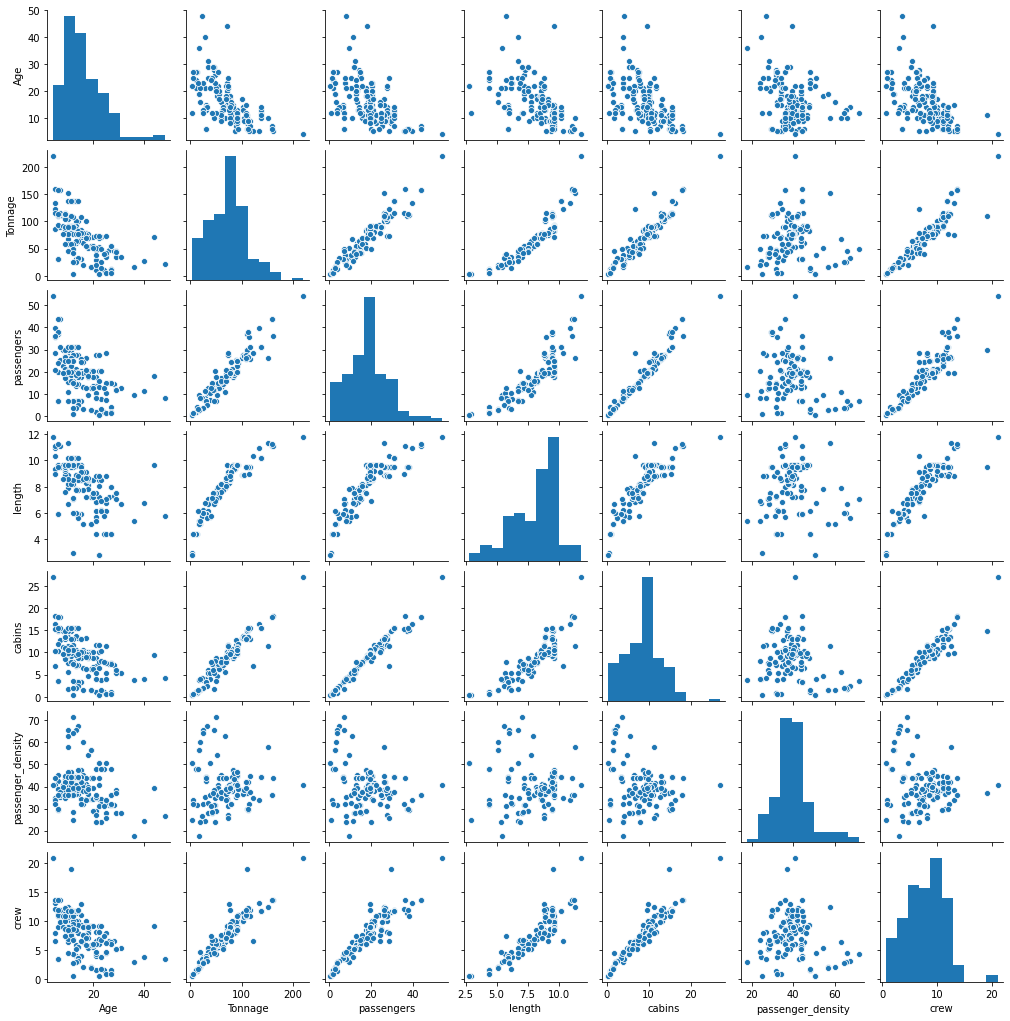

In [6]:
sns.pairplot(df[cols],height=2.0);

#### We can see that the variable crew has a strong correlation with Passengers, length, cabins and Tonnage

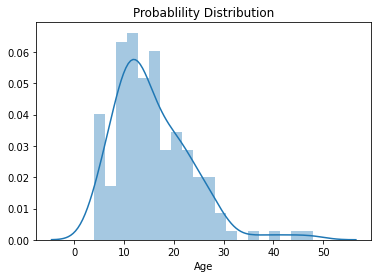

In [7]:
sns.distplot(df['Age'], bins=20)
plt.title('Probablility Distribution')
plt.show()
# We can see that the majority fot the age is around 10 to 25

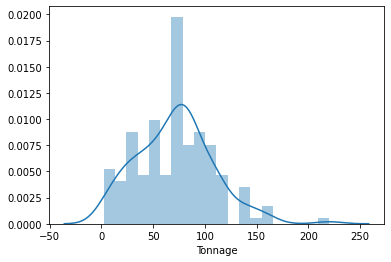

In [8]:
sns.distplot(df['Tonnage'],bins=20)
plt.show()

### Covariance Matrix

In [9]:

# Standardize the data
cols = ['Age', 'Tonnage', 'passengers', 'length', 'cabins','passenger_density','crew']

from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()

X_std = stdsc.fit_transform(df[cols].iloc[:,range(0,7)].values)

In [10]:
df[cols].iloc[:,range(0,7)].head()

,Age,Tonnage,passengers,length,cabins,passenger_density,crew
0,6,30.277,6.94,5.94,3.55,42.64,3.55
1,6,30.277,6.94,5.94,3.55,42.64,3.55
2,26,47.262,14.86,7.22,7.43,31.80,6.70
3,11,110.000,29.74,9.53,14.88,36.99,19.10
4,17,101.353,26.42,8.92,13.21,38.36,10.00


In [11]:
df[cols].values

array([[ 6.   , 30.277,  6.94 , ...,  3.55 , 42.64 ,  3.55 ],
       [ 6.   , 30.277,  6.94 , ...,  3.55 , 42.64 ,  3.55 ],
       [26.   , 47.262, 14.86 , ...,  7.43 , 31.8  ,  6.7  ],
       ...,
       [25.   ,  5.35 ,  1.58 , ...,  0.74 , 33.86 ,  0.88 ],
       [27.   ,  5.35 ,  1.67 , ...,  0.74 , 32.04 ,  0.88 ],
       [23.   , 14.745,  3.08 , ...,  1.56 , 47.87 ,  1.8  ]])

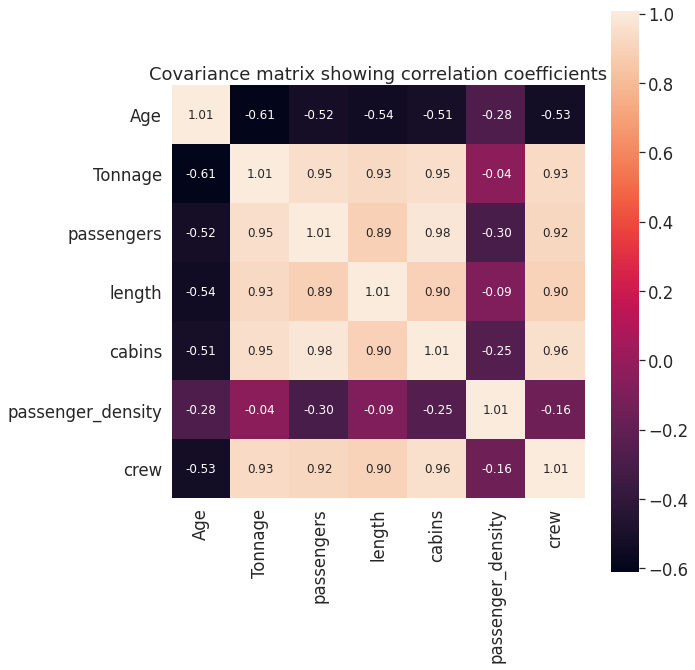

In [12]:
cov_mat = np.cov(X_std.T)
plt.figure(figsize=(10,10))
sns.set(font_scale=1.5)
hm = sns.heatmap(cov_mat,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 12},
                 yticklabels=cols,
                 xticklabels=cols)
plt.title('Covariance matrix showing correlation coefficients')
plt.tight_layout()
plt.show()

In [13]:
#From the covariance matrix plot above, we see that the "crew" 
#variable correlates strongly with 4 predictor variables: "Tonnage", "passengers", "length, and "cabins".

In [14]:
cols_final = ['Tonnage', 'passengers', 'length', 'cabins','crew']

In [15]:
df[cols_final].head()

,Tonnage,passengers,length,cabins,crew
0,30.277,6.94,5.94,3.55,3.55
1,30.277,6.94,5.94,3.55,3.55
2,47.262,14.86,7.22,7.43,6.70
3,110.000,29.74,9.53,14.88,19.10
4,101.353,26.42,8.92,13.21,10.00


In [52]:
X = df[cols_final].iloc[:,0:4].values
y = df[cols_final]['crew'].values

In [53]:
print(X.shape, y.shape)

(158, 4) (158,)


In [54]:
## Partition the data into Training and Testing sets
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4, random_state=0)

In [55]:
## Build  a simple multi regression model

from sklearn.linear_model import LinearRegression
slr=LinearRegression()

slr.fit(X_train,y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

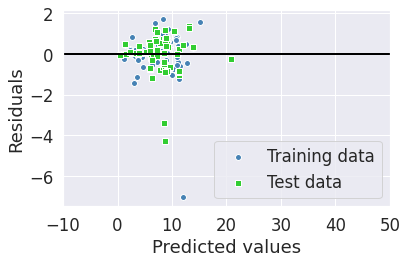

In [56]:


plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='limegreen', marker='s', edgecolor='white',
            label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([-10, 50])
plt.tight_layout()
plt.legend(loc='lower right')
plt.show()



#### As we can see from the above scatter polot, resudials are equally distributed around zero.

### Model Evaluation

In [69]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('MSE train % .3f, test: %.3f ' %(mean_squared_error(y_train, y_train_pred), 
                           mean_squared_error(y_test,y_test_pred)))

print('R^2 train % .3f, test: % .3f' %( r2_score(y_train, y_train_pred),
                                       r2_score(y_test, y_test_pred)))

MSE train  0.955, test: 0.889 
R^2 train  0.920, test:  0.928


In [109]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

train_score = []
test_score = []
cum_variance = []

sc = StandardScaler()

X = df[cols_final].iloc[:,0:4].values     
y = df[cols_final]['crew']

for i in range(1, 5):
  X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4, random_state=0)

  y_train_std = sc.fit_transform(y_train[:, np.newaxis]).flatten()

                                 
  pipe_lr = Pipeline([('scl', StandardScaler()),('pca', PCA(n_components=i)),
                   ('slr', LinearRegression())])
  
  pipe_lr.fit(X_train, y_train_std)
  
  y_train_pred_std = pipe_lr.predict(X_train)
  y_test_pred_std = pipe_lr.predict(X_test)
  y_train_pred=sc.inverse_transform(y_train_pred_std)
  y_test_pred=sc.inverse_transform(y_test_pred_std)
  train_score = np.append(train_score, r2_score(y_train, y_train_pred))
  test_score = np.append(test_score, r2_score(y_test, y_test_pred))


In [110]:
train_score

array([0.90411898, 0.9041488 , 0.90416405, 0.92028261])

In [111]:
test_score

array([0.89217843, 0.89174896, 0.89159266, 0.92827978])